# Active Learning using Uncertainty Quantification Data Analysis

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [18]:
# Set Parameters
N_RUNS = 10
INIT_SIZE = 40
ACQ_SIZE = 40
ACQ_MAX = 2000

N_STEPS = int(np.round((ACQ_MAX - INIT_SIZE) / ACQ_SIZE)) + 1
print("N_STEPS: ", N_STEPS)

# Load data and subset to equal size based on minimum file
MCD_data = pd.read_csv('../data/dataMCD.csv')
ENS_data = pd.read_csv('../data/dataENS.csv')
MCC_data = pd.read_csv('../data/dataMCConnect.csv')
RAND_data = pd.read_csv('../data/dataRAND.csv')

N_STEPS:  50


## Average loss over time

In [19]:
def avg_over_runs (data, col_name):
    """
    Calculates an average over a number of runs of the given column in the given dataframe
    :param data: dataframe containing data to average
    :param col_name: the column which contains the data to average
    """
    res = [0 for _ in range(int(N_STEPS))]

    for i in range(N_RUNS):
        curr_rewards = data.loc[data['run'] == i][col_name].values

        for j in range(int(N_STEPS)):
            res[j] += curr_rewards[j]

    res = [x/N_RUNS for x in res]

    return pd.DataFrame(res)

In [21]:
# calculate the average reward over runs for each agent type
avg_loss_MCD = avg_over_runs(MCD_data, 'Loss')
avg_loss_ENS = avg_over_runs(ENS_data, 'Loss')
avg_loss_MCC = avg_over_runs(MCC_data, 'Loss')
avg_loss_RAND = avg_over_runs(RAND_data, 'Loss')

In [12]:
x_range = np.arange(INIT_SIZE, ACQ_MAX + 1, ACQ_SIZE)
x_range

array([  40,   80,  120,  160,  200,  240,  280,  320,  360,  400,  440,
        480,  520,  560,  600,  640,  680,  720,  760,  800,  840,  880,
        920,  960, 1000, 1040, 1080, 1120, 1160, 1200, 1240, 1280, 1320,
       1360, 1400, 1440, 1480, 1520, 1560, 1600, 1640, 1680, 1720, 1760,
       1800, 1840, 1880, 1920, 1960, 2000])

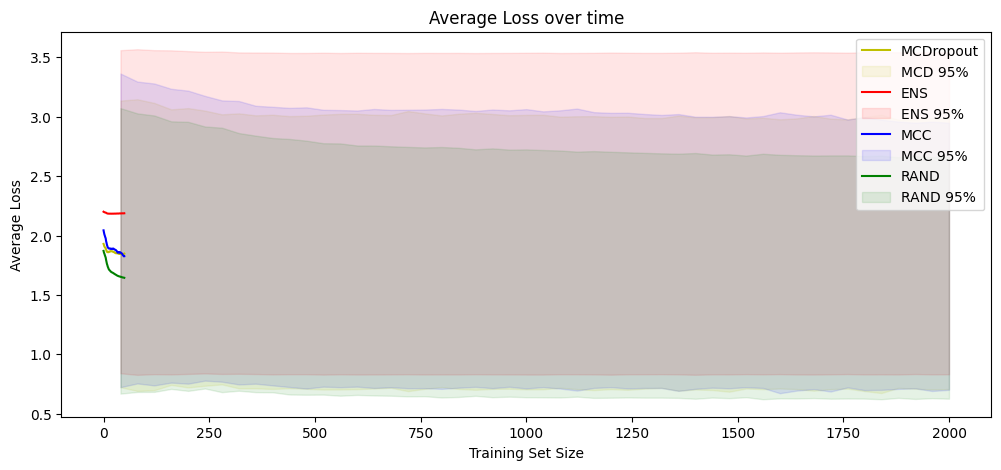

In [23]:
# plot the average loss over time, including the standard deviation
# ref: https://stackoverflow.com/questions/70351809/python-calculate-confidence-interval-for-rolling-average-of-dataframe-entries

WS = 10
Z = 1.96

x_range = np.arange(INIT_SIZE, ACQ_MAX + 1, ACQ_SIZE)

avg_loss_MCD = pd.DataFrame(avg_loss_MCD)
avg_loss_ENS = pd.DataFrame(avg_loss_ENS)
avg_loss_MCC = pd.DataFrame(avg_loss_MCC)
avg_loss_RAND = pd.DataFrame(avg_loss_RAND)

movMeanMCD = avg_loss_MCD.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdMCD = avg_loss_MCD.rolling(window=WS, center=True, min_periods=1).std().values.ravel()


confIntMCD = Z * avg_loss_MCD / np.sqrt(WS)
confIntMCD = confIntMCD.values.ravel()

movMeanENS = avg_loss_ENS.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdENS = avg_loss_ENS.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntENS = Z * avg_loss_ENS / np.sqrt(WS)
confIntENS = confIntENS.values.ravel()

movMeanMCC = avg_loss_MCC.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdMCC = avg_loss_MCC.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntMCC = Z * avg_loss_MCC / np.sqrt(WS)
confIntMCC = confIntMCC.values.ravel()

movMeanRAND = avg_loss_RAND.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdRAND = avg_loss_RAND.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntRAND = Z * avg_loss_RAND / np.sqrt(WS)
confIntRAND = confIntRAND.values.ravel()


plt.figure(figsize=(12,5))
plt.plot(movMeanMCD, label='MCDropout', color='y')
plt.fill_between(x_range, movMeanMCD - confIntMCD, movMeanMCD + confIntMCD,
                 color='y', alpha=.1, label='MCD 95%')

plt.plot(movMeanENS, label='ENS', color='r')
plt.fill_between(x_range, movMeanENS - confIntENS, movMeanENS + confIntENS,
                 color='r', alpha=.1, label='ENS 95%')

plt.plot(movMeanMCC, label='MCC', color='b')
plt.fill_between(x_range, movMeanMCC - confIntMCC, movMeanMCC + confIntMCC,
                 color='b', alpha=.1, label='MCC 95%')

plt.plot(movMeanRAND, label='RAND', color='g')
plt.fill_between(x_range, movMeanRAND - confIntRAND, movMeanRAND + confIntRAND,
                 color='g', alpha=.1, label='RAND 95%')

plt.title('Average Loss over time')
plt.ylabel('Average Loss')
plt.xlabel('Training Set Size')
plt.legend()
plt.show()

In [ ]:
print("Mean and Std. Deviation of Average Loss over Time:")
print(f'MCD {np.mean(avg_loss_MCD)} ({np.std(avg_loss_MCD.values)})')
print(f'ENS {np.mean(avg_loss_ENS)} ({np.std(avg_loss_ENS.values)})')
print(f'MCC {np.mean(avg_loss_MCC)} ({np.std(avg_loss_MCC.values)})')
print(f'RAND {np.mean(avg_loss_RAND)} ({np.std(avg_loss_RAND.values)})')

## Average accuracy over time

In [ ]:
# calculate the average reward over runs for each agent type
avg_accuracy_MCD = avg_over_runs(MCD_data, 'accuracy')
avg_accuracy_ENS = avg_over_runs(ENS_data, 'accuracy')
avg_accuracy_MCC = avg_over_runs(MCC_data, 'accuracy')
avg_accuracy_RAND = avg_over_runs(RAND_data, 'accuracy')

In [ ]:
# plot the average loss over time, including the standard deviation
# ref: https://stackoverflow.com/questions/70351809/python-calculate-confidence-interval-for-rolling-average-of-dataframe-entries

WS = 10
Z = 1.96

x_range = np.array([i for i in range(N_STEPS)])
x_range = 40 * x_range

avg_accuracy_MCD = pd.DataFrame(avg_accuracy_MCD)
avg_accuracy_ENS = pd.DataFrame(avg_accuracy_ENS)
avg_accuracy_MCC = pd.DataFrame(avg_accuracy_MCC)
avg_accuracy_RAND = pd.DataFrame(avg_accuracy_RAND)

movMeanMCD = avg_accuracy_MCD.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdMCD = avg_accuracy_MCD.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntMCD = Z * avg_accuracy_MCD / np.sqrt(WS)

movMeanENS = avg_accuracy_ENS.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdENS = avg_accuracy_ENS.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntENS = Z * avg_accuracy_ENS / np.sqrt(WS)

movMeanMCC = avg_accuracy_MCC.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdMCC = avg_accuracy_MCC.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntMCC = Z * avg_accuracy_MCC / np.sqrt(WS)

movMeanRAND = avg_accuracy_RAND.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStdRAND = avg_accuracy_RAND.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confIntRAND = Z * avg_accuracy_RAND / np.sqrt(WS)


plt.figure(figsize=(12,5))
plt.plot(movMeanMCD, label='MCDropout', color='y')
plt.fill_between(x_range, movMeanMCD - confIntMCD, movMeanMCD + confIntMCD,
                 color='y', alpha=.1, label='MCD 95%')

plt.plot(movMeanENS, label='ENS', color='r')
plt.fill_between(x_range, movMeanENS - confIntENS, movMeanENS + confIntENS,
                 color='r', alpha=.1, label='ENS 95%')

plt.plot(movMeanMCC, label='MCC', color='b')
plt.fill_between(x_range, movMeanMCC - confIntMCC, movMeanMCC + confIntMCC,
                 color='b', alpha=.1, label='MCC 95%')

plt.plot(movMeanRAND, label='RAND', color='g')
plt.fill_between(x_range, movMeanRAND - confIntRAND, movMeanRAND + confIntRAND,
                 color='g', alpha=.1, label='RAND 95%')

plt.title('Average Accuracy over time')
plt.ylabel('Average Accuracy')
plt.xlabel('Training Set Size')
plt.legend()
plt.show()